<a href="https://colab.research.google.com/github/AFA21SCM21BO/Project-Mood-Prediction/blob/main/Code/RNN/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_csv(r'spotify_merged_dataset.csv')
df.head()

,Unnamed: 0,session_id,session_length,skip_2,track_id,acousticness,danceability,loudness,speechiness,liveness
0,0,1_00001238-3f7a-4fd2-b52e-af4237a41ed9,20,True,t_91eb6576-0f1f-4394-92d8-560d7b8f632b,0.085350,0.790459,-4.66,0.052383,0.112247
1,1,1_00001238-3f7a-4fd2-b52e-af4237a41ed9,20,True,-999,-999.000000,-999.000000,-999.00,-999.000000,-999.000000
2,2,1_00001238-3f7a-4fd2-b52e-af4237a41ed9,20,True,t_98e73634-8f33-4275-b544-3451553f431e,0.133331,0.607389,-9.09,0.358223,0.122876
3,3,1_00001238-3f7a-4fd2-b52e-af4237a41ed9,20,False,-999,-999.000000,-999.000000,-999.00,-999.000000,-999.000000
4,4,1_00001238-3f7a-4fd2-b52e-af4237a41ed9,20,False,-999,-999.000000,-999.000000,-999.00,-999.000000,-999.000000


In [4]:
def importDataSet():
  
  # importing the merged dataset from spotify
  spotifyData = pd.read_csv("spotify_merged_dataset.csv")
  tempDf = spotifyData

  # converting boolean output column to int 
  tempDf["skip_2"] = tempDf["skip_2"]*1
  
  y = tempDf["skip_2"].to_numpy()
  # print(tempDf.info())
  # Dropping output column and serial number column
  tempDf = tempDf.drop(tempDf.columns[[0, 1,3,4]], axis=1)
  # print(tempDf.info())

  x = tempDf.to_numpy()
  print(y)
  return spotifyData,x,y

In [5]:
# Test train Split
from tensorflow.keras.utils import to_categorical
spotifyData,X,Y = importDataSet()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
X_train,X_test = X_train / 255.0, X_test / 255.0

[1 1 1 ... 0 0 1]


In [6]:
X_train

array([[ 7.84313725e-02, -3.91764706e+00, -3.91764706e+00,
        -3.91764706e+00, -3.91764706e+00, -3.91764706e+00],
       [ 7.84313725e-02,  1.52920230e-04,  2.01464471e-03,
        -2.25725492e-02,  1.42871413e-04,  1.02767068e-03],
       [ 3.92156863e-02, -3.91764706e+00, -3.91764706e+00,
        -3.91764706e+00, -3.91764706e+00, -3.91764706e+00],
       ...,
       [ 7.84313725e-02,  1.93474141e-03,  3.10417367e-03,
        -1.61764706e-02,  8.81899104e-04,  3.33089338e-04],
       [ 7.84313725e-02, -3.91764706e+00, -3.91764706e+00,
        -3.91764706e+00, -3.91764706e+00, -3.91764706e+00],
       [ 7.84313725e-02,  4.31883773e-04,  2.63320395e-03,
        -3.17294102e-02,  9.57136002e-04,  3.23699707e-04]])

In [7]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,

((33500, 6), (33500, 2), (16500, 6), (16500, 2))

In [9]:
model = keras.models.Sequential()
model.add(layers.SimpleRNN(units=10, activation='sigmoid',input_shape = (6,1)))
model.add(layers.Dense(28, activation="sigmoid")) 
model.add(layers.Dense(8, activation="sigmoid")) 
model.add(layers.Dense(2,activation='sigmoid'))

In [10]:
loss = keras.losses.CategoricalCrossentropy(from_logits='true')
optim = keras.optimizers.Adamax(lr=0.01)
metrics = ["accuracy"]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [11]:
model.compile(loss=loss,optimizer=optim , metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 28)                308       
                                                                 
 dense_1 (Dense)             (None, 8)                 232       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 678
Trainable params: 678
Non-trainable params: 0
_________________________________________________________________


In [12]:
y_train.shape

(33500, 2)

In [13]:
history=model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_test,y_test),verbose=2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


262/262 - 2s - loss: 0.6944 - accuracy: 0.5024 - val_loss: 0.6931 - val_accuracy: 0.5042 - 2s/epoch - 6ms/step
Epoch 2/10
262/262 - 1s - loss: 0.6937 - accuracy: 0.4993 - val_loss: 0.6930 - val_accuracy: 0.5042 - 626ms/epoch - 2ms/step
Epoch 3/10
262/262 - 1s - loss: 0.6936 - accuracy: 0.5017 - val_loss: 0.6929 - val_accuracy: 0.5124 - 547ms/epoch - 2ms/step
Epoch 4/10
262/262 - 1s - loss: 0.6935 - accuracy: 0.5020 - val_loss: 0.6929 - val_accuracy: 0.5042 - 564ms/epoch - 2ms/step
Epoch 5/10
262/262 - 1s - loss: 0.6938 - accuracy: 0.5022 - val_loss: 0.6934 - val_accuracy: 0.5042 - 526ms/epoch - 2ms/step
Epoch 6/10
262/262 - 1s - loss: 0.6937 - accuracy: 0.5013 - val_loss: 0.6938 - val_accuracy: 0.5042 - 537ms/epoch - 2ms/step
Epoch 7/10
262/262 - 1s - loss: 0.6937 - accuracy: 0.5003 - val_loss: 0.6936 - val_accuracy: 0.5042 - 559ms/epoch - 2ms/step
Epoch 8/10
262/262 - 1s - loss: 0.6934 - accuracy: 0.5018 - val_loss: 0.6949 - val_accuracy: 0.4958 - 564ms/epoch - 2ms/step
Epoch 9/10
262

In [14]:
pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.30-py3-none-any.whl size=8793 sha256=ca84c7629e97f0057cf1722fe932fb87361175d94b2a42bbb5c4fceab4a8e987
  Stored in directory: /root/.cache/pip/wheels/b0/60/47/8c5aa37c06be5e97879ec467bc2e6a30b315d95f662c63a503
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.29-py3-none-any.whl size=7877 sha256=47d8f7fe871a5b7df1339997e5f1d59f73f7b2dc444555be2064dc411bd6fad1
  Stored in directory: /root/.cache/pip/wheels/c2/f5/71/d1c459da10abec864a1979b449edbf37d4a82ab3e38a3625a8
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4585 sha256=eed9b7266a7aae0a93a4baadfeeaad819191501e575869d422f70fc318e1235c
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


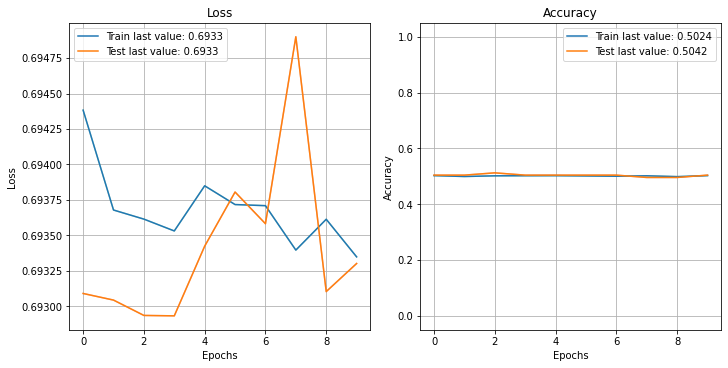

In [15]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
show_history(history)
plot_history(history, path="standard.png")
plt.close()

In [28]:
import numpy as np
# Getting the predicted values based on the model data
# pred = model.predict_classes(X_test)
# df1= pd.DataFrame(pred, columns = ['skip'])
pred=model.predict(X_test) 
classes_x=np.argmax(pred,axis=1)
df1= pd.DataFrame(classes_x, columns = ['skip'])
print(classes_x)

# Appending the predicted values to the test set. The skip prediction can be used to classify the mood
spotifyData_x_train, spotifyData_x_test, spotifyData_y_train, spotifyData_y_test = train_test_split(spotifyData, Y, test_size=0.33, random_state=42)

# Merging the train and predicted values
headers = list(spotifyData.columns.values)
df2 = pd.DataFrame(spotifyData_x_test, columns = headers)
df2 = pd.concat([df1, df2], axis=1)
df2.describe()

[1 1 1 ... 1 1 1]


,skip,Unnamed: 0,session_length,skip_2,acousticness,danceability,loudness,speechiness,liveness
count,16500.0,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000
mean,1.0,24884.965758,17.600909,0.504182,-514.588442,-514.375878,-518.098877,-514.628591,-514.603670
std,0.0,14487.277550,3.405669,0.499998,499.395752,499.614874,495.781735,499.354340,499.380034
min,1.0,0.000000,10.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.0,12352.500000,15.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.0,24886.000000,20.000000,1.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,1.0,37414.750000,20.000000,1.000000,0.113482,0.673098,-6.480000,0.081934,0.124094
max,1.0,49992.000000,20.000000,1.000000,0.994909,0.979716,0.175000,0.965393,0.989395


In [29]:
def moodClassification(acousticness,danceability,loudness,speechiness,liveness):
  # ser = pd.Series(acousticness, dtype='int32')
  if (acousticness > 0.7 and speechiness < 0.5):
    # 0 for chill mood
    return 0
  elif (danceability > 0.6 ):
    # 1 for energetic 
    return 1
  elif (danceability > 0.5 or loudness>0.4 ):
    # 2 for romantic 
    return 2
  elif (danceability > 0.4 and  (loudness>0.4 or speechiness> .15)):
    # 3 for cheeerful 
    return 3
  else:
    return 4

def printMood(mood, sessionId):
  moodString = ""
  if (mood == 0 ):
    # 0 for chill mood
    moodString = 'chill'
  elif (mood == 1  ):
    moodString = 'energetic'
  elif (mood == 2 ):
    # 2 for romantic 
    moodString = 'romantic'
  elif (mood == 3 ):
    # 3 for cheeerful 
    moodString = 'cheeerful'
  print("Mood for the Session Id : ",sessionId, " is ", moodString)

In [31]:
groupby_sessionId = df2.groupby('session_id',as_index=False)

# Iterating over the grouped sessions
for sessionId, frame in groupby_sessionId:
    
    # Dropping the columns with irrelavent data like trackid, session length
    frame = frame.drop(frame.columns[[ 1,2,3,4,5]], axis=1)
    
    # Selecting the songs that are not skipped to predict mood
    frame[frame < 0] = 0
    
    # Classifying the mood based on accoustic features
    frame['mood'] = frame.apply(lambda row : moodClassification(row['acousticness'],
                     row['danceability'], row['loudness'],row['speechiness'], row['liveness']), axis = 1)

    # dropping the rows with unknown moods
    frame = frame[frame.mood != 4]

    # Printing the mood of the session based on the mode of each session
    if not len(frame['mood'].mode()):
      print("All the songs in the session : ",sessionId," are skipped")
    else:
      printMood(frame['mood'].mode()[0], sessionId)

Mood for the Session Id :  1_00001238-3f7a-4fd2-b52e-af4237a41ed9  is  energetic
Mood for the Session Id :  1_00001396-6ac0-4583-a3fd-c286579eda66  is  chill
Mood for the Session Id :  1_00010670-8e11-4d16-9a05-9bebd37ba758  is  energetic
All the songs in the session :  1_000157d2-9424-4240-88ae-12b9d2835e52  are skipped
Mood for the Session Id :  1_00015a7d-b075-4661-85c5-e3f424344dda  is  energetic
Mood for the Session Id :  1_0001d537-c90e-46b8-873e-668b7b89a9b5  is  energetic
Mood for the Session Id :  1_000217bc-f2f0-4b48-8589-7feb841caea5  is  energetic
Mood for the Session Id :  1_000230e7-9449-42d3-b405-496c574fc571  is  energetic
Mood for the Session Id :  1_00023a52-3b53-4f8d-b997-7fe9bd578135  is  chill
Mood for the Session Id :  1_00025f52-d430-47dc-8ea7-d7ef9c30dae1  is  energetic
All the songs in the session :  1_00028fe4-2c83-428a-ac94-003deea7efa9  are skipped
Mood for the Session Id :  1_00029010-473a-4e40-afb7-06819f0218e9  is  energetic
Mood for the Session Id :  1_0